# dataset de aprovação de crédito disponível no UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Credit+Approval

5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    - A1:	b, a.
    - A2:	continuous.
    - A3:	continuous.
    - A4:	u, y, l, t.
    - A5:	g, p, gg.
    - A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    - A7:	v, h, bb, j, n, z, dd, ff, o.
    - A8:	continuous.
    - A9:	t, f.
    - A10:	t, f.
    - A11:	continuous.
    - A12:	t, f.
    - A13:	g, p, s.
    - A14:	continuous.
    - A15:	continuous.
    - A16: +,-         (class attribute)

8.  Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    - A1:  12
    - A2:  12
    - A4:   6
    - A5:   6
    - A6:   9
    - A7:   9
    - A14: 13

9.  Class Distribution
  
    - +: 307 (44.5%)
    - -: 383 (55.5%)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Bad key savefig.frameon in file d:\users\rafaeldellama\anaconda3\envs\nnga\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file d:\users\rafaeldellama\anaconda3\envs\nnga\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file d:\users\rafaeldellama\anaconda3\envs\nnga\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr'

## Leitura do dataset

In [2]:
dataset = pd.read_csv("dataset.csv", names=[f"A{i}" for i in range(1, 17)])
labels =  dataset["A16"]

In [3]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


## Tratamento de valores faltantes - Representados por '?'
Nro de amostras com dados faltantes por coluna

In [5]:
dataset.eq('?').sum()

d:\users\rafaeldellama\anaconda3\envs\nnga\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
d:\users\rafaeldellama\anaconda3\envs\nnga\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [6]:
row_with_nan = dataset[dataset.eq('?').any(1)]
print(f"Nro de linhas com dados faltantes: {len(row_with_nan)}")
row_with_nan

Nro de linhas com dados faltantes: 37


d:\users\rafaeldellama\anaconda3\envs\nnga\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
d:\users\rafaeldellama\anaconda3\envs\nnga\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
206,a,71.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
248,?,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-


Existem diversas formas de tratar valore faltantes e isso vai depender da necessidade do projeto.
- 1° excluir as amostras onde contém esses valores faltantes
    - Desvantagem: Há chances de que possamos remover muitas amostras, o que tornará nossa análise não confiável.
- 2° excluir a feature que contém esses valores faltantes
    - Desvantagem: Ao eliminar muitas features, podemos correr o risco de perder informações relevantes.
- 3° preencher com novos dados:
    - 3.1 - Quando se trata de variavel continua, os valores faltantes normalmente pela:
     substituição dos valores ausentes pela média (também poderia ser utilizado mediana, valor constante..) de toda a coluna. A vantagem deste método é que ele mantém o intervalo dos dados, porém tem a desvantagem de variabilidade dos dados é reduzida, de modo que os desvios padrão e as estimativas de variância tendem a ser subestimados.        
    - 3.2 - Quando se trava de variaveis categoricas a substituição dos valores ausentes pelo valor mais frequente


Neste dataset, das 690 amostras, apenas 37 (5.36%) apresentam valores faltantes, então poderia ser adotada a estratégia de remover as amostras que possuem dados faltantes. Porém na sequencia serão abordadas as estratégias para preenchimento dos valores faltantes.

In [7]:
continuous_columns = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
categorical_columns = [c for c in dataset.columns if c not in continuous_columns]

print(f"continuous_columns: {continuous_columns}")
print(f"categorical_columns: {categorical_columns}")

original_dataset = dataset.copy()

continuous_columns: ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
categorical_columns: ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']


### Variaveis Continuas
A estrátegia adotada para o preenchimendo dos valores continuos faltantes foi substituí-los pela média da coluna

In [8]:
dataset[continuous_columns].head()

,A2,A3,A8,A11,A14,A15
0,30.83,0.000,1.25,1,00202,0
1,58.67,4.460,3.04,6,00043,560
2,24.50,0.500,1.50,0,00280,824
3,27.83,1.540,3.75,5,00100,3
4,20.17,5.625,1.71,0,00120,0


In [9]:
from sklearn.impute import SimpleImputer
import numpy as np

for c in continuous_columns:
    dataset[c] = dataset[c].replace("?", np.nan)
    
imputer_continuous = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_continuous.fit(dataset[continuous_columns])
dataset[continuous_columns] = imputer_continuous.transform(dataset[continuous_columns])

### Variaveis Categorias
A estrátegia adotada para o preenchimendo dos valores categoricos faltantes foi substituí-los pelao valor mais frequente da coluna

In [10]:
dataset[categorical_columns].head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
0,b,u,g,w,v,t,t,f,g,+
1,a,u,g,q,h,t,t,f,g,+
2,a,u,g,q,h,t,f,f,g,+
3,b,u,g,w,v,t,t,t,g,+
4,b,u,g,w,v,t,f,f,s,+


In [11]:
imputer_cat = SimpleImputer(missing_values='?', strategy='most_frequent')
imputer_cat.fit(dataset[categorical_columns])
dataset[categorical_columns] = imputer_cat.transform(dataset[categorical_columns])

## Análise exploratória de dados do dataset

d:\users\rafaeldellama\anaconda3\envs\nnga\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
d:\users\rafaeldellama\anaconda3\envs\nnga\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
d:\users\rafaeldellama\anaconda3\envs\nnga\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
d:\users\rafaeldellama\anaconda3\envs\nnga\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


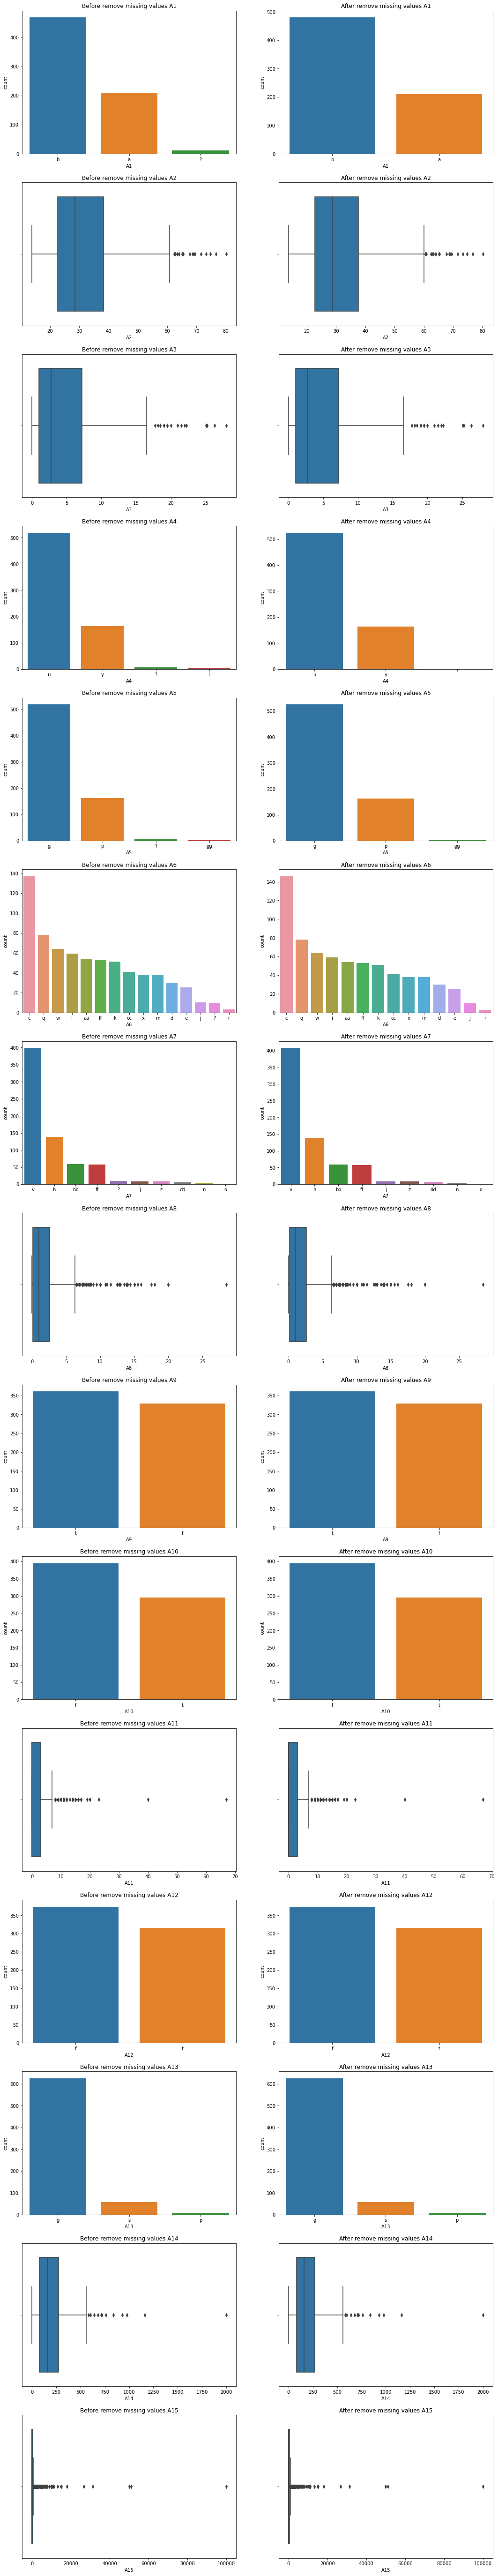

In [12]:
plt.figure().set_size_inches(18, 100)

for i in range(1, 16):
    column = f"A{i}"
    plt.subplot(15, 2, 2 * i - 1)
    plt.title("Before remove missing values " + column)
    
    if column in continuous_columns:
        data = original_dataset[original_dataset[column] != "?"][column].astype("float32")
        sns.boxplot(data)
    else: # Categorico
        sns.countplot(original_dataset[column], order=original_dataset[column].value_counts().index)
        
    plt.subplot(15, 2, 2 * i)
    plt.title("After remove missing values " + column)

    if column in continuous_columns:
        sns.boxplot(dataset[column])
    else: # Categorico
        sns.countplot(dataset[column], order=dataset[column].value_counts().index)

plt.show()

#### Distribuição em relação ao label

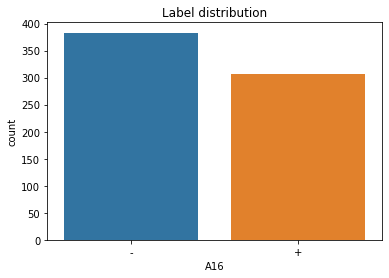

In [14]:
plt.figure().set_size_inches(6, 4)
sns.countplot(labels, order=labels.value_counts().index)
plt.title("Label distribution")
plt.show()

### Correlação de variáveis

#### Correlação entre Categorico x Continuo
- ANOVA (Analysis of Variance)
- The greater the F score value the higher the correlation will be.

In [15]:
from scipy import stats

def correlation_cont_cat(dataset, cont, cat):
    list_of_samples = []
    for val in np.unique(dataset[cat]):
        list_of_samples.append(dataset[dataset[cat]==val][cont])
            
    F, p = stats.f_oneway(*list_of_samples)
    return F

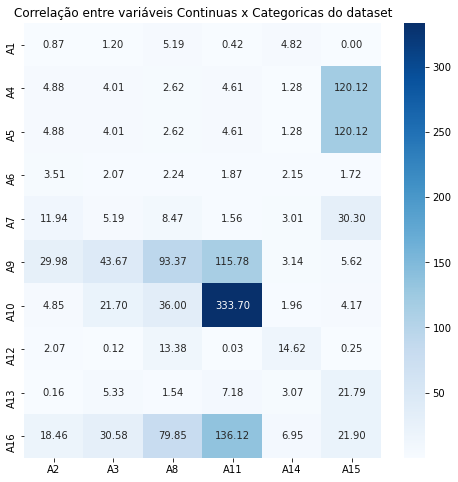

In [16]:
cont_cat_corr = pd.DataFrame(index=categorical_columns, columns=continuous_columns)
for cont in continuous_columns:
    for cat in categorical_columns:
        F = correlation_cont_cat(dataset, cont, cat)
        cont_cat_corr[cont][cat] = F

cont_cat_corr = cont_cat_corr.astype("float64")

plt.figure().set_size_inches(8, 8)

sns.heatmap(cont_cat_corr,
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis Continuas x Categoricas do dataset')
plt.show()

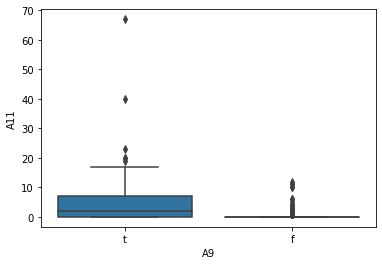

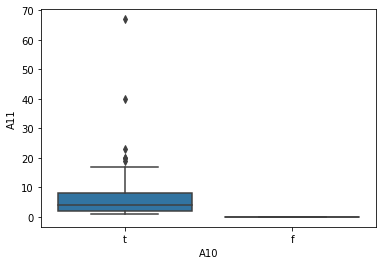

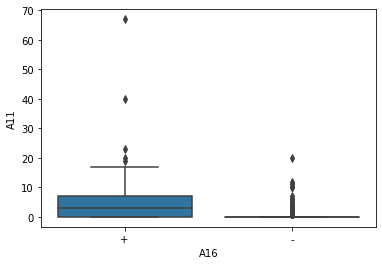

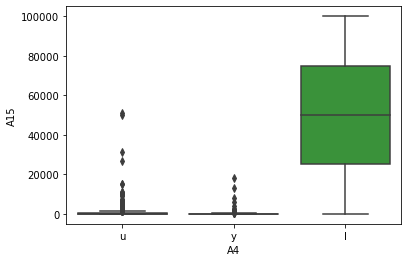

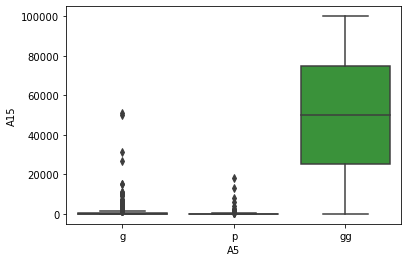

In [17]:
limit = 100

for column in cont_cat_corr.columns:
    idxs = cont_cat_corr[cont_cat_corr[column] > limit].index
    for idx in idxs:
        plt.figure().set_size_inches(6, 4)
        sns.boxplot(x=idx, y=column, data=dataset)
        plt.show()

#### Correlação entre Categorico x Categorico
calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher

In [18]:
from scipy import stats

def cramers_v(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

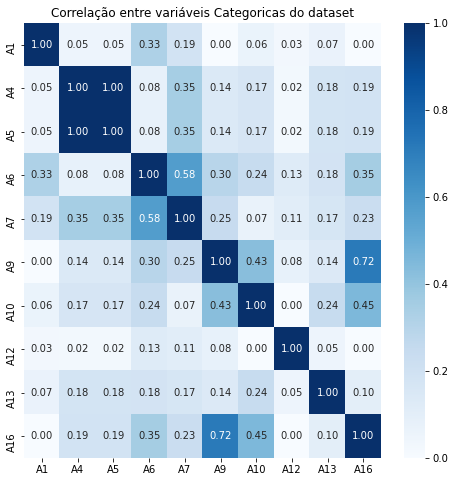

In [19]:
cat_corr = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for i in range(len(categorical_columns)):
    cat_corr[categorical_columns[i]][categorical_columns[i]] = 1.0
    for j in range(i+1, len(categorical_columns)):
        F = cramers_v(dataset[categorical_columns[i]], dataset[categorical_columns[j]])
        cat_corr[categorical_columns[i]][categorical_columns[j]] = F
        cat_corr[categorical_columns[j]][categorical_columns[i]] = F


cat_corr = cat_corr.astype("float64")

plt.figure().set_size_inches(8, 8)
sns.heatmap(cat_corr,
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis Categoricas do dataset')
plt.show()

In [20]:
from collections import Counter

A4_A5 = []

for _, row in dataset.iterrows():
    t = (row["A4"], row["A5"])
    A4_A5.append(t)

Counter(A4_A5)

Counter({('u', 'g'): 525, ('y', 'p'): 163, ('l', 'gg'): 2})

In [21]:
A9_A16 = []

for _, row in dataset.iterrows():
    t = (row["A9"], row["A16"])
    A9_A16.append(t)

Counter(A9_A16)

Counter({('t', '+'): 284, ('f', '+'): 23, ('t', '-'): 77, ('f', '-'): 306})

#### Correlação entre Continuo x Continuo

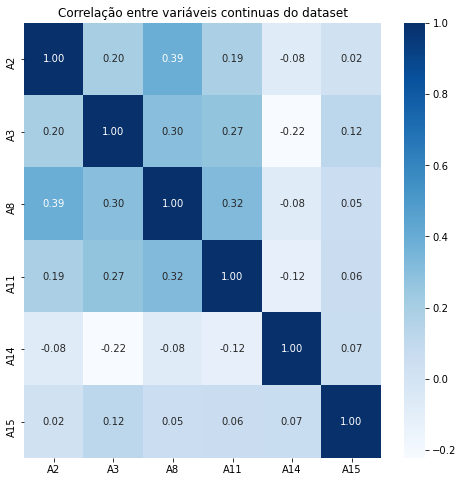

In [22]:
plt.figure().set_size_inches(8, 8)

sns.heatmap(dataset[continuous_columns].corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis continuas do dataset')
plt.show()

Através da análise da correlação das variáveis é possível observar:
    - A4 e A5 tem correlação direta, 
        Se A4 == 'u', então A5 == 'g'
        Se A4 == 'y', então A5 == 'p'
        Se A4 == 'l', então A5 == 'gg'
    - A9 e A16 (label) possuem grande correlação
        Se A9 == 't', 78% de chance de A16 == '+'
        Se A9 == 'f', 93% de chance de A16 == '-'
    - Em média, o valor do atributo continuo A11 é maior quando o atributo A9 == 't' ou quando A10 == 't'
    - Quando a classe é '+', em média o valor de A11 é maior do que quando a classe é '-'
    - Em média, o valor do atributo continuo A15 é mais alto quando o atributo A4 == 'l' / A5 == 'gg'

## Engenharia de features para treinamento do modelo

In [23]:
dataset = dataset.drop(columns=["A16"])

### Encoder

A maioria dos algoritmos de classificação não suportam dados categórios, logo as variaveis categoricas devem ser transformadas em representações númericas.
Existem dois tipos de variaveis categórias: nominal e ordinal
    - Ordinal: existe uma ordem entre os valores. Exemplo: temperatura: baixa, média, alta
      Neste caso os dados devem ser transformados para numéricos mantendo a ordem:
          baixa: 0
          média: 1
          alta: 2
      Ou seja baixa < média < alta, ou 0 < 1 < 2

    - Nominal: não existe uma ordem entre os valores. Exemplo: cor: vermelho, verde, azul..
      Quando a variavel é ordinal, não faz sentido falar vermelho < verde ou vermelho < azul..
      Neste caso os dados devem ser transformados utilizando a representação One-Hot-Encoding
          vermelho: 001
          verde: 010
          azul: 100
          
* Quando a variavel categorica é binária, ambas as abordagens podem ser utilizadas

Como os valores dos atributos do dataset foram alterados para símbolos sem sentido não é possível saber se os dados são Nominais ou Ordinais. Por esse motivo os atributos categoricos serão considerados nominais.

In [24]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0


In [25]:
from sklearn.preprocessing import LabelEncoder

# Binarios
# A1: b, a.
# A9: t, f.
# A10: t, f.
# A12: t, f.
labelencoder = LabelEncoder()
dataset["A1"] = labelencoder.fit_transform(dataset["A1"])
dataset["A9"] = labelencoder.fit_transform(dataset["A9"])
dataset["A10"] = labelencoder.fit_transform(dataset["A10"])
dataset["A12"] = labelencoder.fit_transform(dataset["A12"])

# Multiclass
# A4: u, y, l, t.
# A5: g, p, gg.
# A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
# A7: v, h, bb, j, n, z, dd, ff, o.
# A13: g, p, s.
dataset = pd.get_dummies(dataset, columns=["A4", "A5", "A6", "A7", "A13"])


# labels: binária (+/-)
labelencoder_class = LabelEncoder()
labels = labelencoder_class.fit_transform(labels)

In [26]:
dataset.head()

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
0,1,30.83,0.000,1.25,1,1,1.0,0,202.0,0.0,...,0,0,0,0,0,1,0,1,0,0
1,0,58.67,4.460,3.04,1,1,6.0,0,43.0,560.0,...,0,1,0,0,0,0,0,1,0,0
2,0,24.50,0.500,1.50,1,0,0.0,0,280.0,824.0,...,0,1,0,0,0,0,0,1,0,0
3,1,27.83,1.540,3.75,1,1,5.0,1,100.0,3.0,...,0,0,0,0,0,1,0,1,0,0
4,1,20.17,5.625,1.71,1,0,0.0,0,120.0,0.0,...,0,0,0,0,0,1,0,0,0,1


### Detecção de outliers utilizando o método KNN

Como o dataset não possui descrição de cada atributo fica dificil analisar os possíveis outliers presentes nos boxplots apresentados na análise exploratória do dataset.

Por esse motivo foi aplicada uma técnica de detecção de outliers através do algoritmo de KNN, porém nenhum dos dados foram removidos do dataset.

In [27]:
from pyod.models.knn import KNN
detector = KNN()
detector.fit(dataset)

# get the prediction labels and outlier scores of the training data
previsoes = detector.labels_ # binary labels (0: inliers, 1: outliers)
confianca_previsoes = detector.decision_scores_ # raw outlier scores

outliers = []
for i in range(len(dataset)):
    if previsoes[i] == 1: # Se na previsao for 1, valor é considerado outlier
        outliers.append(i)
        
print("Possíveis outliers")
dataset.iloc[outliers, :]  # lista dos indices dos outliers

Possíveis outliers


,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
6,1,33.17,1.040,6.500,1,0,0.0,1,164.0,31285.0,...,0,1,0,0,0,0,0,1,0,0
13,1,48.08,6.040,0.040,0,0,0.0,0,0.0,2690.0,...,0,0,0,0,0,1,0,1,0,0
29,1,42.08,1.040,5.000,1,1,6.0,1,500.0,10000.0,...,0,0,0,0,0,1,0,1,0,0
32,1,49.50,7.585,7.585,1,1,15.0,1,0.0,5000.0,...,0,0,0,0,0,0,0,1,0,0
33,0,36.75,5.125,5.000,1,0,0.0,1,0.0,4000.0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0,28.08,15.000,0.000,1,0,0.0,0,0.0,13212.0,...,0,0,0,0,0,0,1,1,0,0
588,1,26.67,1.750,1.000,1,1,5.0,1,160.0,5777.0,...,0,0,0,0,0,1,0,1,0,0
589,1,25.33,0.580,0.290,1,1,7.0,1,96.0,5124.0,...,0,0,0,0,0,1,0,1,0,0
596,0,46.08,3.000,2.375,1,1,8.0,1,396.0,4159.0,...,0,0,0,0,0,1,0,1,0,0


### Features relevantes
Para analisar os atributos mais relevantes podemos utilizar o algoritmo de DecisionTree baseado no ganho de informação.


Text(0.5, 1.0, 'Importância de cada feature')

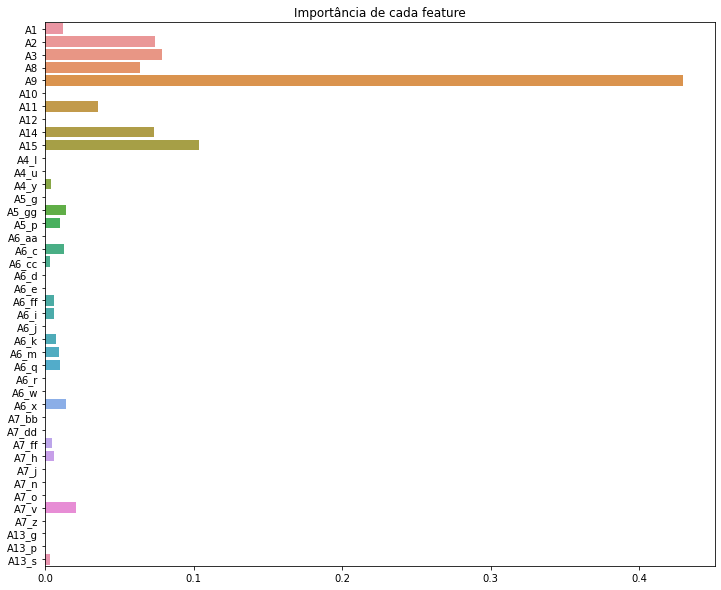

In [28]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_model.fit(dataset, labels)

plt.figure().set_size_inches(12, 10)
importances = pd.Series(data=decision_tree_model.feature_importances_, index=dataset.columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

Como é possivel observar, apenas as features A10 e A12 não foram utilizadas pelo modelo, sendo as features A9 e A15 as com maior ganho de informação .

### Normalização
Alguns algoritmos de classificação convergem mais rápido se forem treinados com dados normalizados. Existem várias técnicas de normalização, entre as mais comuns estão a MinMax e a StandardScaler.

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
dataset_norm = dataset.copy()
dataset_norm[dataset.columns] = scaler.fit_transform(dataset_norm[dataset.columns])

In [30]:
dataset_norm.head()

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
0,0.661438,-0.062321,-0.956613,-0.291083,0.95465,1.157144,-0.288101,-0.919195,0.104544,-0.195413,...,-0.300079,-0.5,-0.108306,-0.07636,-0.053916,0.831370,-0.108306,0.322490,-0.108306,-0.300079
1,-1.511858,2.288101,-0.060051,0.244190,0.95465,1.157144,0.740830,-0.919195,-0.819689,-0.087852,...,-0.300079,2.0,-0.108306,-0.07636,-0.053916,-1.202834,-0.108306,0.322490,-0.108306,-0.300079
2,-1.511858,-0.596738,-0.856102,-0.216324,0.95465,-0.864196,-0.493887,-0.919195,0.557942,-0.037144,...,-0.300079,2.0,-0.108306,-0.07636,-0.053916,-1.202834,-0.108306,0.322490,-0.108306,-0.300079
3,0.661438,-0.315599,-0.647038,0.456505,0.95465,1.157144,0.535044,1.087908,-0.488360,-0.194837,...,-0.300079,-0.5,-0.108306,-0.07636,-0.053916,0.831370,-0.108306,0.322490,-0.108306,-0.300079
4,0.661438,-0.962303,0.174141,-0.153526,0.95465,-0.864196,-0.493887,-0.919195,-0.372104,-0.195413,...,-0.300079,-0.5,-0.108306,-0.07636,-0.053916,0.831370,-0.108306,-3.100868,-0.108306,3.332456


## Divisão em treinamento e teste
O dataset será dividido em treino/teste. 
A base de treinamento será utilizada para encontrar o melhor modelo através de validação cruzada e estimar seu desempenho. Posteriormente a base de teste (que nunca foi vista pelo modelo) será utilizada para testar o melhor modelo encontrado na fase anterior.

In [31]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(dataset_norm.values, labels, test_size=0.2, random_state=0)

from collections import Counter
print('Amostras treinamento:' ,classe_treinamento.shape[0])
counter = Counter(classe_treinamento)
print(sorted(counter.items()))
print('Amostras teste:' ,classe_teste.shape[0])
counter = Counter(classe_teste)
print(sorted(counter.items()))

Amostras treinamento: 552
[(0, 247), (1, 305)]
Amostras teste: 138
[(0, 60), (1, 78)]


A quantidade de amostras de cada classe está desbalanceada, o que irá afetar a precisão do classificador. Os métodos mais comuns de serem aplicados para lidar com este problema são: Oversampling e undersampling e utilização de pesos (class_weights).

Oversampling: consiste em duplicar as observações da classe minoritária para obter um conjunto de dados balanceado, deixando a base de dados com amostras repetidas. Como a classe minoritária ('+' representado por 0) possui 247 amostras, a aplicação da técnica de oversampling replicaria alguns dos registros dessa classe para deixar ambas as classes com 305 amostras.

Undersampling: Aleatoriamente remove amostras da classe majoritária, com ou sem substituição. Esta técnica pode aumentar a variância do classificador e pode potencialmente descartar amostras úteis ou importantes e consequentemente dificultando o aprendizado.

Outra abordagem é atribuir um peso para cada classe, de forma a atribuir um peso maior para a classe minoritária (e conseguentemente uma punição maior em caso de erro) em relação a classe majoritária. Nesta abordagem não é necessário o equilibrio da base de dados, pois a diferença de pesos atribuido a cada classe compensa o desbalanceamento. Esta última abordagem foi a adotada.

In [33]:
# Calculo dos pesos atribuidos a cada classe no conjunto de treinamento para compensar o desequilibrio da base de dados
from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight('balanced', np.unique(classe_treinamento), classe_treinamento)
class_weight_dict = {l: w for l, w in zip(np.unique(classe_treinamento), class_weight)}
print('Peso de cada classe:')
print(class_weight_dict)

Peso de cada classe:
{0: 1.1174089068825912, 1: 0.9049180327868852}


## Treinamento dos modelos utilizando StratifiedKFold
- Nesta etapa será utilizado apenas o dataset de treinamento para encontrar o modelo com maior acurácia para este problema
- Será utilizado o StratifiedKFold para gerar os folds mantendo a proporção de cada classe nos folds gerados.
- Será utilizada a acurácia balanceada visto que as classes estão desbalanceadas

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    confusion_matrix,
    balanced_accuracy_score,
    classification_report
)

skf = StratifiedKFold(n_splits=10,  # Nro de folds
                     random_state=0,
                      shuffle=True
                     )
skf.get_n_splits(previsores_treinamento, classe_treinamento)

10

In [35]:
def create_df_report(balanced_accuracy, model_name):
    """
    Make a dataframe with the model_name column containing the result of 
    each cross-validation run and the average, min, max and std of the results 
    obtained by the model
    
    Parameters
    ----------
    balanced_accuracy: list
        list containing the balanced accuracy obtained in each exec of the cross-val
    model_name: str
        model name
        
    Returns
    -------
        df: Pandas Dataframe
            dataframe from results of cross-val 
    """
    df = pd.DataFrame(balanced_accuracy, columns=[model_name])
    mean_result = df.mean()
    min_result = df.min()
    max_result = df.max()
    std_result = df.std()
    df.loc["mean"] = mean_result
    df.loc["min"] = min_result
    df.loc["max"] = max_result
    df.loc["std"] = std_result
    
    return df

def run_cross_val_sklearn(model, previsores_treinamento, classe_treinamento, model_name):
    """
    Performs cross-validation for sklearn models and returns the report in dataframe format
    
    Parameters
    ----------
    model: sklearn model
        Model for which the cross-val will be performed
    previsores_treinamento: numpy.array
        Numpy array containing input values to be used to train the model
    classe_treinamento: numpy.array
        Numpy array containing expected output values to be used to train the model
    model_name: str
        model name
        
    Returns
    -------
        df: Pandas Dataframe
            dataframe from results of cross-val
    """
    balanced_accuracy = []
    for train_index, test_index in skf.split(previsores_treinamento, classe_treinamento):    
        X_train, X_test = previsores_treinamento[train_index], previsores_treinamento[test_index]
        y_train, y_test = classe_treinamento[train_index], classe_treinamento[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = balanced_accuracy_score(y_test, y_pred)
        balanced_accuracy.append(acc)

    return create_df_report(balanced_accuracy, model_name)

In [36]:
results = []

### Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
results.append(run_cross_val_sklearn(nb_model, previsores_treinamento, classe_treinamento, "Naive Bayes"))

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion='entropy', class_weight=class_weight_dict, random_state=0)
results.append(run_cross_val_sklearn(decision_tree_model, previsores_treinamento, classe_treinamento, "Decision Tree"))

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=40, criterion='entropy', class_weight=class_weight_dict, random_state=0)
results.append(run_cross_val_sklearn(random_forest_model, previsores_treinamento, classe_treinamento, "Random Forest"))

### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
results.append(run_cross_val_sklearn(knn_model, previsores_treinamento, classe_treinamento, "KNN"))

### LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression
logistic_reg_model = LogisticRegression(class_weight=class_weight_dict, random_state=0)
results.append(run_cross_val_sklearn(logistic_reg_model, previsores_treinamento, classe_treinamento, "LogisticRegression"))

### Máquinas de vetores de suporte (SVM)

In [42]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', class_weight=class_weight_dict, random_state=0)
results.append(run_cross_val_sklearn(svm_model, previsores_treinamento, classe_treinamento, "SVM"))

### Redes Neurais

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2, L1L2

regularizer = L1L2(l1=0.005, l2=0.005)

def create_mlp_model():
    """
    Create a MLP model using tensorflow.keras.Sequential
    
    Returns
    -------
        mlp: tensorflow.keras.Sequential
            MLP model
    """
    mlp = Sequential()
    mlp.add(Dense(units = 20, activation = 'relu', input_dim=previsores_treinamento.shape[1], kernel_regularizer=regularizer))
    mlp.add(Dropout(0.2))
    mlp.add(Dense(units = 10, activation = 'relu', kernel_regularizer=regularizer))
    mlp.add(Dropout(0.2))
    mlp.add(Dense(units = 1, activation = 'sigmoid'))
    
    mlp.compile(optimizer="adam", loss ='binary_crossentropy',
                metrics = ['binary_accuracy'])

    return mlp

def plot_history(history):
    """
    Plot model history
    
    Parameters
    ----------
    
    history: model.history
        Model history
    """
    plt.figure().set_size_inches(20, 5)

    # Accuracy vs Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history['binary_accuracy'],'r')
    plt.plot(history['val_binary_accuracy'],'g')
    plt.xticks(np.arange(0, len(history['binary_accuracy']), 25))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])

    # Loss vs Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'],'r')
    plt.plot(history['val_loss'],'g')
    plt.xticks(np.arange(0, len(history['binary_accuracy']), 25))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
    plt.show()
    
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                         filename=None):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Parameters
    ----------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools
    from matplotlib import pyplot as plt

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    if filename is not None:
        plt.savefig(filename)
    plt.show()

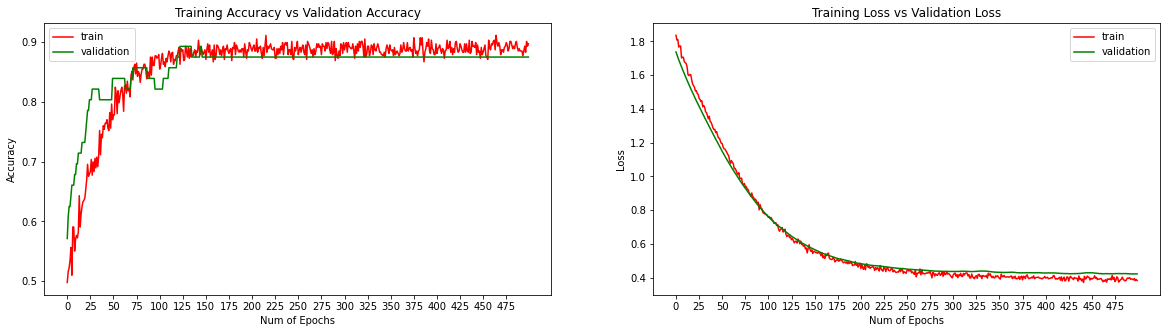

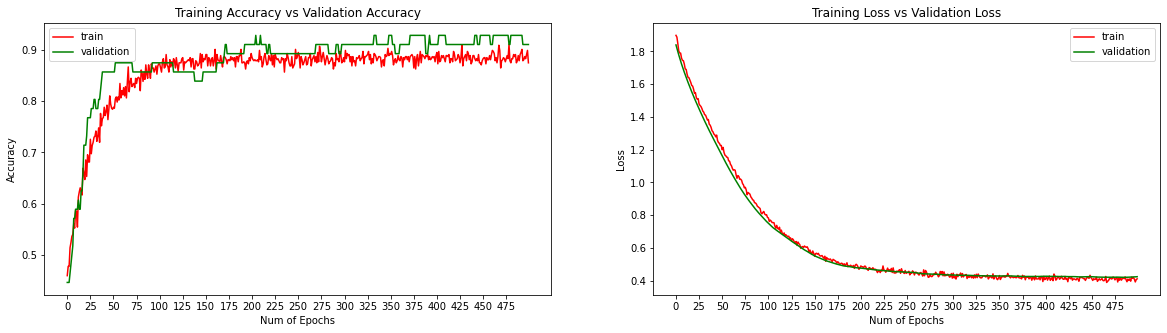

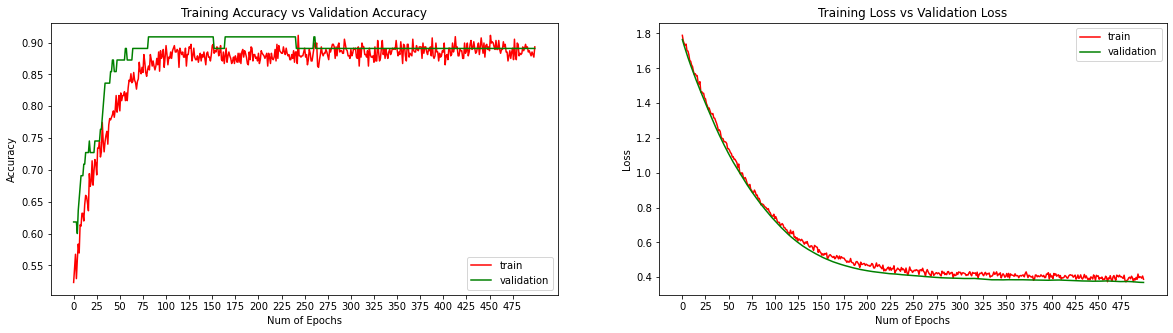

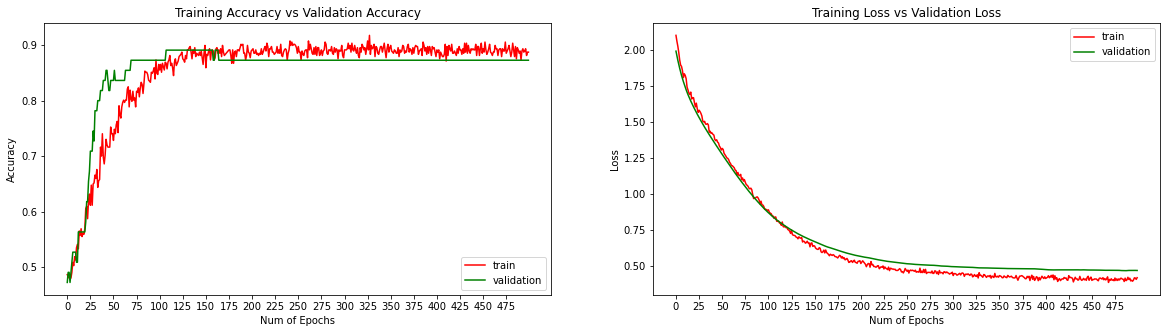

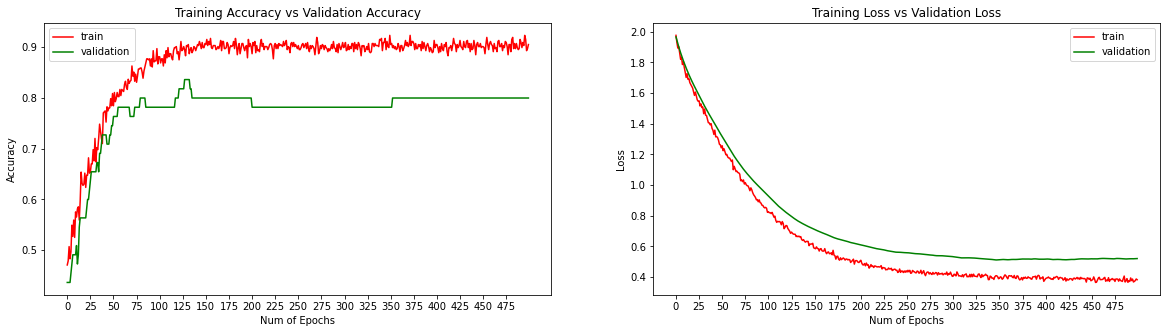

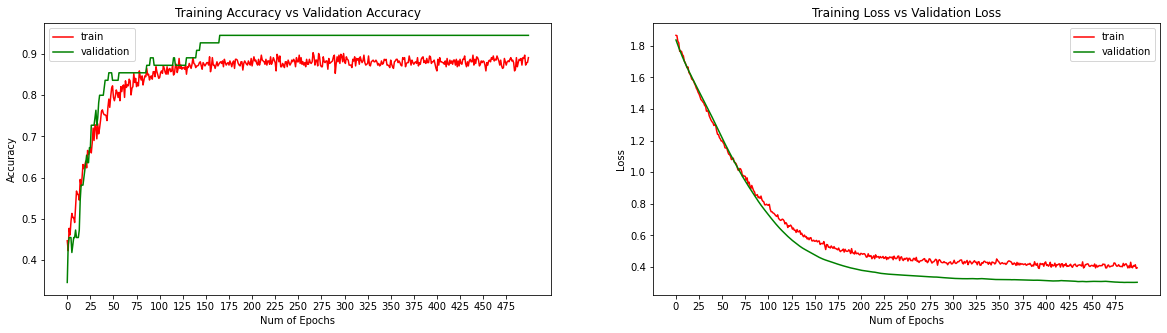

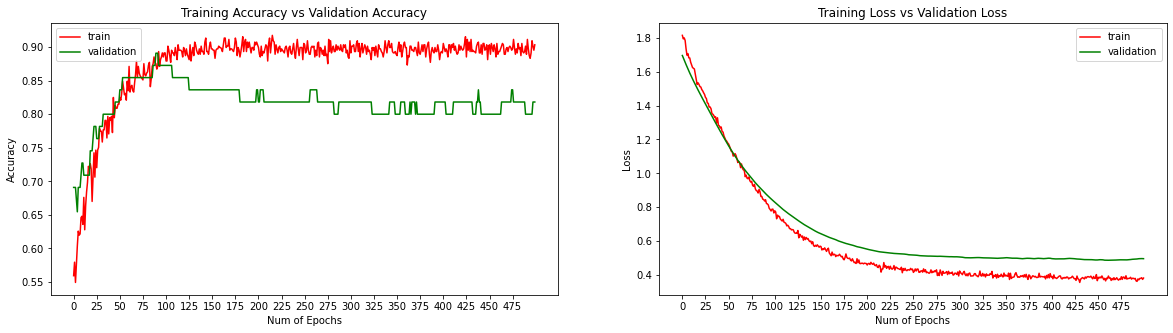

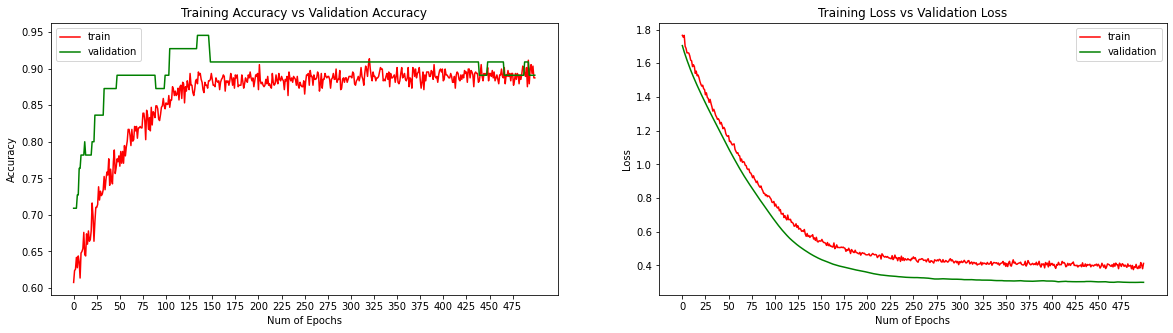

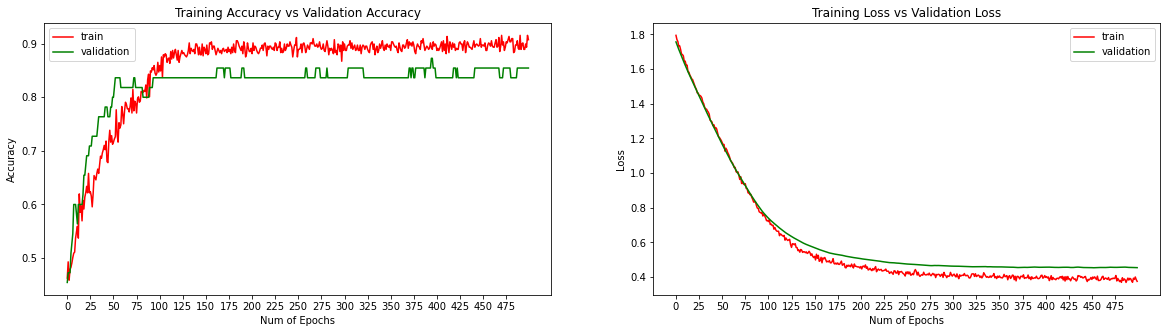

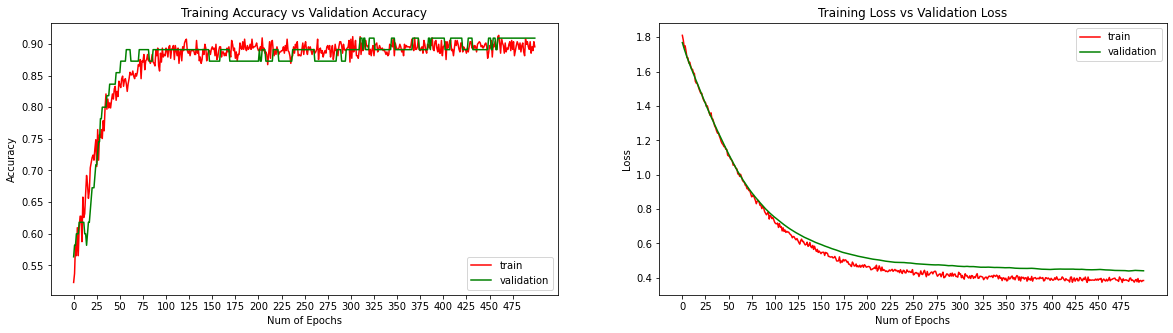

In [44]:
balanced_accuracy = []

for train_index, test_index in skf.split(previsores_treinamento, classe_treinamento):    
    X_train, X_test = previsores_treinamento[train_index], previsores_treinamento[test_index]
    y_train, y_test = classe_treinamento[train_index], classe_treinamento[test_index]
    
    mlp = create_mlp_model()
    history = mlp.fit(X_train, y_train, batch_size=256, epochs=500, verbose=0, 
                      class_weight=class_weight, validation_data=(X_test, y_test), 
                     )
    plot_history(history.history)
    y_pred = mlp.predict(X_test)
    y_pred = (y_pred > 0.5) # se > 0.5 -> 1 caso contrário 0
    
    acc = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy.append(acc)
    
results.append(create_df_report(balanced_accuracy, "MLP"))

## Report results

In [45]:
pd.concat(results, axis=1, sort=False)

,Naive Bayes,Decision Tree,Random Forest,KNN,LogisticRegression,SVM,MLP
0,0.760000,0.831613,0.871613,0.827742,0.879355,0.879355,0.879355
1,0.823226,0.851613,0.903871,0.863871,0.855484,0.943871,0.907742
2,0.673333,0.856667,0.893333,0.853333,0.876667,0.843333,0.893333
3,0.623333,0.816667,0.873333,0.813333,0.873333,0.820000,0.873333
4,0.770000,0.876667,0.786667,0.800000,0.826667,0.813333,0.810000
5,0.620000,0.890000,0.926667,0.830000,0.950000,0.896667,0.950000
6,0.683333,0.766667,0.840000,0.666667,0.806667,0.843333,0.823333
7,0.754704,0.778226,0.926075,0.875000,0.914651,0.893817,0.893817
8,0.676075,0.815188,0.852151,0.782930,0.893817,0.803763,0.852151
9,0.567204,0.729839,0.847446,0.720430,0.889113,0.877688,0.905242


A tabela acima ilustra a acurácia balanceada obtida pelos modelos testados em cada um dos folds. Como é possível observar, o modelo de MLP obteve o melhor resultado com acurácia média de 87.88%. 

## Treinamento do modelo final
Nesta etapa será utilizado todo o dataset de treino (80% dos dados) para treinar o modelo final e o dataset de teste (20% dos dados) para avaliar a solução final.

### Classificador único
Como o modelo de MLP obteve o melhor resultado no cross-validation e visando a melhor acc do sistema utilizado na predição, ele será o modelo utilizado na predição.

In [46]:
mlp = create_mlp_model()
model_history = mlp.fit(previsores_treinamento, classe_treinamento, batch_size=256, epochs=500, verbose=0,
                  class_weight=class_weight, validation_data=(previsores_teste, classe_teste))

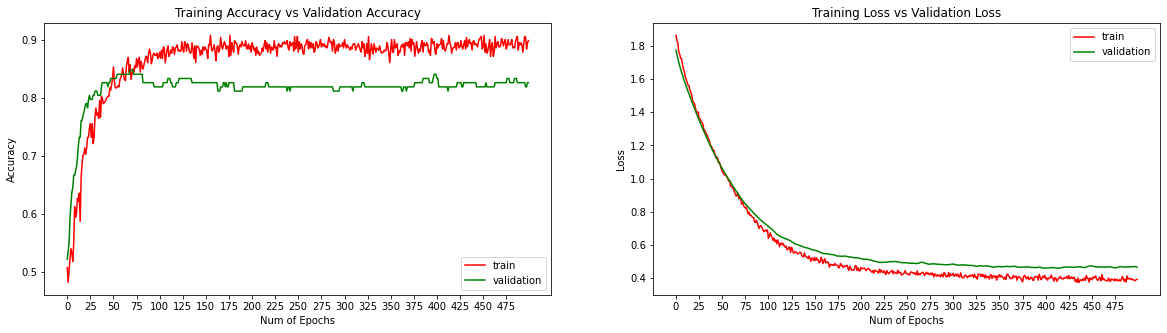

Acc balanceada: 0.823076923076923



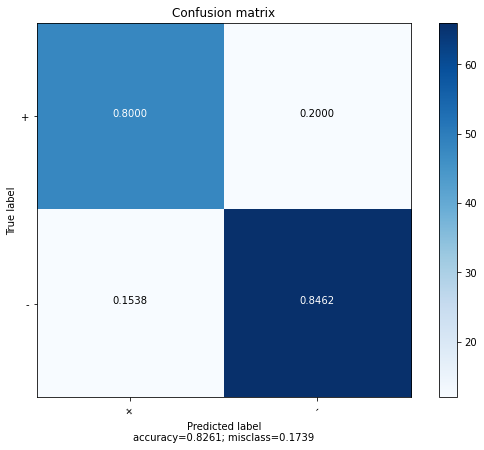

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        60
           1       0.85      0.85      0.85        78

    accuracy                           0.83       138
   macro avg       0.82      0.82      0.82       138
weighted avg       0.83      0.83      0.83       138

{0: '+', 1: '-'}


In [47]:
plot_history(model_history.history)

y_pred = mlp.predict(previsores_teste)
y_pred = (y_pred > 0.5) # se > 0.5 -> 1 caso contrário 0

acc = balanced_accuracy_score(classe_teste, y_pred)
matriz = confusion_matrix(classe_teste, y_pred)

print(f'Acc balanceada: {acc}\n')
plot_confusion_matrix(matriz, labelencoder_class.classes_)


labels = { i : labelencoder_class.classes_[i] for i in range(0, len(labelencoder.classes_) ) }
report = classification_report(classe_teste, y_pred)
print(report)
print(labels)

#### Salvar modelo de MLP final

In [48]:
with open('mlp.json', 'w') as json_file:
    json_file.write(mlp.to_json())
mlp.save_weights('mlp.h5')

### Esamble de Classificadores
No intuito de melhorar o desempenho do classificador final, podemos cria rum esamble de classificadores. Neste caso serão utilizados os 4 modelos com melhor desempenho no cross-validation (MLP, Logistic Regression, Random Forest e SVM) 

In [49]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

random_forest_model = RandomForestClassifier(n_estimators=40, criterion='entropy', class_weight=class_weight_dict, random_state=0)
logistic_reg_model = LogisticRegression(class_weight=class_weight_dict, random_state=0)
svm_model = SVC(kernel='rbf', class_weight=class_weight_dict, random_state=0)
    
mlp_model = KerasClassifier(build_fn=create_mlp_model, batch_size=256, epochs=500, verbose=0,
#                   class_weight=class_weight
                           )
mlp_model._estimator_type = "classifier"

In [50]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf', random_forest_model), 
    ('lr', logistic_reg_model), 
    ('svm', svm_model),
    ('mlp', mlp_model)
]
esamble = StackingClassifier(estimators=estimators)

esamble.fit(previsores_treinamento, classe_treinamento)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(class_weight={0: 1.1174089068825912,
                                                                     1: 0.9049180327868852},
                                                       criterion='entropy',
                                                       n_estimators=40,
                                                       random_state=0)),
                               ('lr',
                                LogisticRegression(class_weight={0: 1.1174089068825912,
                                                                 1: 0.9049180327868852},
                                                   random_state=0)),
                               ('svm',
                                SVC(class_weight={0: 1.1174089068825912,
                                                  1: 0.9049180327868852},
                                    random_state=0)),
                               (

Acc balanceada: 0.8378205128205127



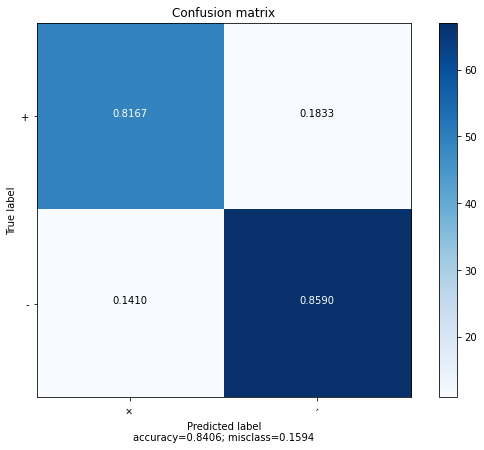

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        60
           1       0.86      0.86      0.86        78

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138

{0: '+', 1: '-'}


In [51]:
y_pred = esamble.predict(previsores_teste)

acc = balanced_accuracy_score(classe_teste, y_pred)
matriz = confusion_matrix(classe_teste, y_pred)

print(f'Acc balanceada: {acc}\n')

plot_confusion_matrix(matriz, labelencoder_class.classes_)

labels = { i : labelencoder_class.classes_[i] for i in range(0, len(labelencoder_class.classes_) ) }
report = classification_report(classe_teste, y_pred)
print(report)
print(labels)